In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats.stats import pearsonr
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.dates as mdates
import pandas as pd

In [6]:
# Radon
mdnRnA = np.loadtxt('../mdnRnA.txt', delimiter=',')
startday = pd.datetime(2013, 7, 1)
dates = pd.date_range(startday, periods=len(mdnRnA), freq='W')
dates[-1]

Timestamp('2019-07-21 00:00:00', freq='W-SUN')

In [26]:
# Weather
PMP = pd.read_csv('../AEMET/Data/Daily/NVR/NVR_arima_weekly.csv', usecols=['fecha', 'tmed', 'presmed', 'velmedia'])
PMP['fecha'] = pd.to_datetime(BCN['fecha'])
PMP.describe()

,tmed,velmedia,presmed
count,316.000000,316.000000,316.000000
mean,13.614248,3.577390,965.829927
std,6.472158,1.177355,5.245625
min,1.271429,0.528571,947.739409
25%,7.857143,2.782143,963.025000
50%,13.657143,3.542857,965.839286
75%,18.934184,4.378571,968.598214
max,26.957143,6.585714,980.928571


Text(0, 0.5, '$\\bar{T}\\ (^o C)$')

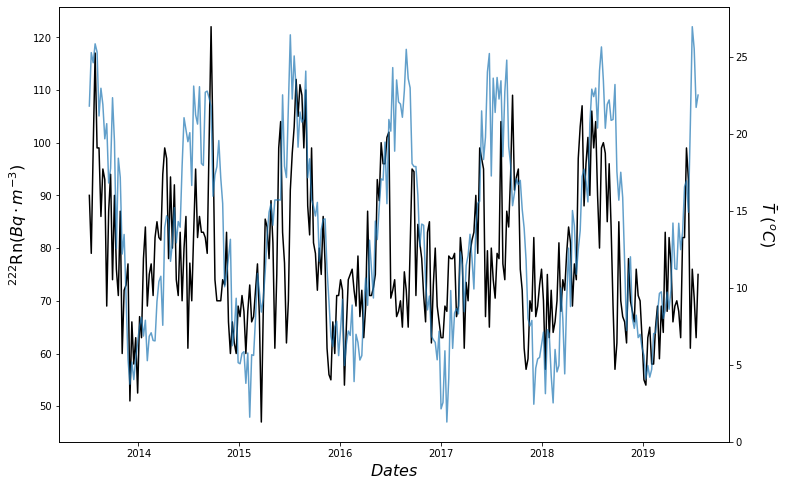

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
ax.plot(dates, mdnRnA, 'k')
ax.set_ylabel('$^{222}$Rn($Bq \cdot m^{-3}$)', fontsize=16)
ax.set_xlabel('$Dates$', fontsize=16)
ax2 = ax.twinx()
ax2.plot(PMP['fecha'].values, PMP['tmed'].values, alpha=0.7)
ax2.set_ylabel(r'$\bar{T}\ (^o C)$', rotation=-90, labelpad=30, fontsize=16)

In [35]:
PMP['mdnRnA'] = mdnRnA

In [36]:
PMP.head()

,fecha,tmed,velmedia,presmed,mdnRnA
0,2013-07-07,21.800000,4.200000,970.150000,90.0
1,2013-07-14,25.271429,2.885714,964.714286,79.0
2,2013-07-21,24.614286,2.855952,965.854464,99.0
3,2013-07-28,25.842857,2.842857,961.771429,117.0
4,2013-08-04,25.314286,3.642857,966.421429,99.0


In [63]:
DF = pd.DataFrame({'mdnRnA': mdnRnA, 'T': PMP['tmed']})
DF.index = PMP['fecha']

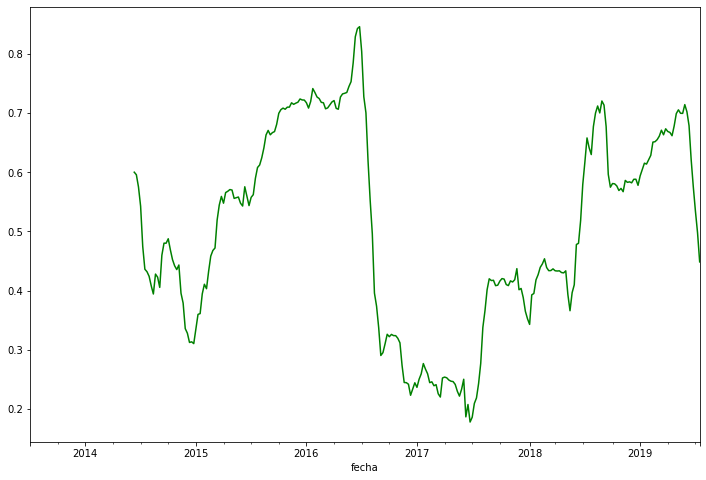

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
DF['mdnRnA'].rolling(window=50).corr(other=DF['T']).plot(style='-g')

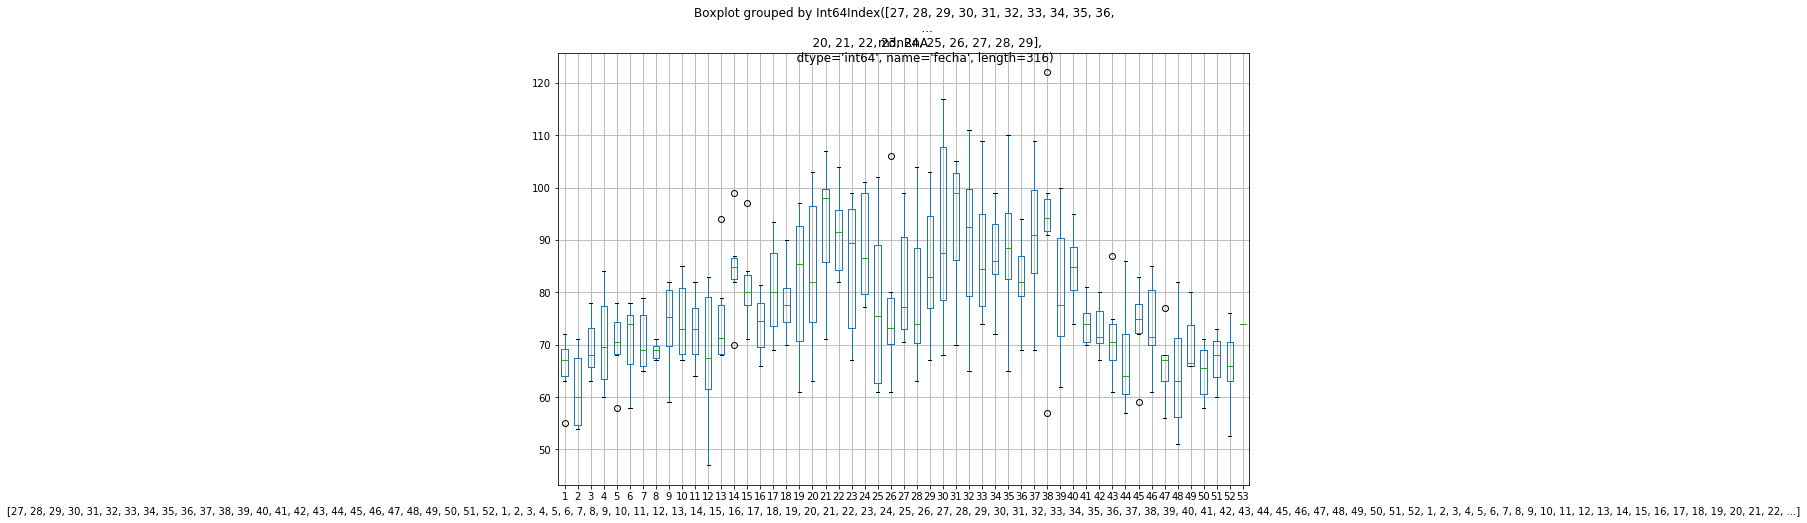

In [86]:
DF.boxplot(column=['mdnRnA'], by=DF.index.week, figsize=(12,8))

In [82]:
DF.index.week

Int64Index([27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
            ...
            20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64', name='fecha', length=316)